# Data analysis 
## Paper: Mechanical confinement induces transition in  the dynamics of cell migration
#### Authors: *M. Moreira-Soares, S. Pinto-Cunha, J. R. Bordin & R. D. M. Travasso*

In this notebook we explore the behaviour of cells under confinement in fibrous media. We quantify cell migration and shape as a function of two parameters: the adhesion strength $\eta$ between the cells and the fibres and the fibres density $\rho$. 


### Requirements
The scripts were written in Python 3. For installing the required packages run the file *requirements.txt* in the terminal as the following:

``pip3 install -r requirements.txt``


- numpy==1.16.2
- scipy==1.2.1
- matplotlib==3.0.3
- orca==1.5.1
- pandas==0.24.1
- seaborn==0.9.0



In [1]:
# loading packages
FONT_SIZE=16
import matplotlib.pyplot as plt
import seaborn as sns  # statistics and plotting
import pandas as pd  # DataFrame - structured data handling
import numpy as np # numerical library
import scipy.stats as stats # statistics
from matplotlib import rc # LaTeX for labels and legends - Ex:  r'$\LaTeX$'
plt.style.use('seaborn-colorblind') #  Worldwide, there are approximately 300 million people with colour blindness!
rc('text', usetex=True)

In [2]:
# reading the data from a csv file
data_se = pd.read_csv('data/surface_energy.csv') # surface energy

Surface energy $\sum||\nabla^2 \phi||$ as a function of  $\rho$ and $\eta$ for a static cell $v = 0$. Measuring this energy we can measure even small variations in the surface of the cell, which can be related to the roughness. 

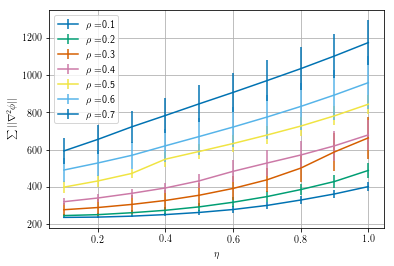

In [15]:
density = 0.10
xmin = 0.0
xmax = 1.5
ymin = 0.0
ymax = 18.0

while(density<=0.70):
    # Pandas built-in function to select data for a given condition -> DataFrame.loc[(data['column']==condition1)]
    x = data_se.loc[(data_se['density']==np.round(density,decimals=2))] 
    
    # defining labels
    plt.xlabel(r'$\eta $')
    plt.ylabel(r'$\sum||\nabla^2 \phi||$')
    # enabling the grid
    plt.grid() 
    
    # matplotlib errorbar plot
    plt.errorbar(x['adhesion'],x['strg'],x['stdev'],label=r'$\rho=$'+str(np.round(density,decimals=2))) 
    
    # setting up the axes limits
    #plt.xlim([xmin,xmax])
    #plt.ylim([ymin,ymax])
    
    # plotting the legends
    plt.legend()
    
    # uncomment the following line for saving each curve in a different file
    #plt.savefig("sigma"+str(np.round(density,decimals=2))+".png",dpi=600) 
    
    # you must use plt.show() to dump the plots - if you don't it will hold and superpose every plot until 
    # it finds the plt.show() instruction or the script ends execution
    # this is why the instruction is outside this loop.
    
    density+=0.1
plt.savefig("graphs/surface_energy_lines.png",dpi=600)   
plt.show() # if you put

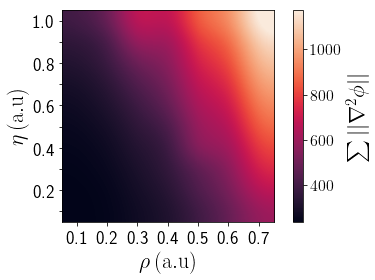

In [31]:
# DataFrame.pivot() function will organize data in a grid - it is required for plotting colormaps
plt.tick_params(labelsize=18)
pvt = data_se.pivot("adhesion", "density", "strg")

cmap = sns.cm.rocket_r # if you want to invert the colormap, you can call it here and then 
                       #  set up sns.heatmap( ..., cmap=cmap) - consult SeaBorn documentation for more colormaps


#ax = sns.heatmap(pvt,linewidths=.00, cbar_kws={'label': r'$\sum||\nabla^2 \phi||$'}) # for showing numbers use annot=True

plt.xlabel(r'$\rho \,\mathrm{(a.u)}$', fontsize=FONT_SIZE)
plt.ylabel(r'$\eta \,\mathrm{(a.u)}$', fontsize=FONT_SIZE)
#ax.invert_yaxis() # inverting the y axis 

#plt.show()

im = plt.imshow(pvt, interpolation='spline36', origin='lower', cmap='rocket', aspect=0.7)
cb = plt.colorbar()
cb.set_label(r'$\sum||\nabla^2 \phi||$', fontsize=FONT_SIZE)
cb.ax.tick_params(labelsize=16)
xt = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
yt = [None,0.2,None,0.4,None,0.6,None,0.8,None,1.0,None, 1.2, None, 1.4]
plt.xticks(np.arange(7), xt)
plt.yticks(np.arange(10), yt)
plt.tight_layout()
plt.savefig("graphs/surface_energy.png",dpi=600) #uncomment this line if you want to save the figure
plt.show()

density,0.1,0.2,0.3,0.4,0.5,0.6,0.7
adhesion,,,,,,,
0.1,235.54,245.36,276.77,319.93,398.21,490.19,592.92
0.2,237.07,250.22,288.57,339.70,431.29,527.87,654.71
0.3,242.21,260.56,305.20,364.75,471.61,568.97,722.03
0.4,250.61,273.71,326.53,393.74,548.53,620.33,783.46
0.5,262.15,292.13,354.65,432.08,589.98,670.29,846.13
0.6,277.85,316.91,391.11,483.12,632.55,721.13,907.33
0.7,299.76,347.19,437.29,527.52,678.01,774.77,970.57
0.8,328.86,385.01,500.23,570.78,726.27,831.90,1034.93
0.9,361.55,428.48,587.51,620.25,781.54,893.61,1103.21


In [18]:
# loading another set of data for plotting the velocity as a function of density for 3 values of adhesion
rho = pd.read_csv('data/density.csv')
rho = pd.read_csv('data/new-data-dpd/Vel-vs-Density-Fixed.csv', delim_whitespace=True, comment='#')
rho = pd.read_csv('data/new-data-dpd/Vel-vs-Density-Flex.csv', delim_whitespace=True, comment='#')
rho_s = pd.read_csv('data/rho_sus.csv')

### Velocity as a function of density

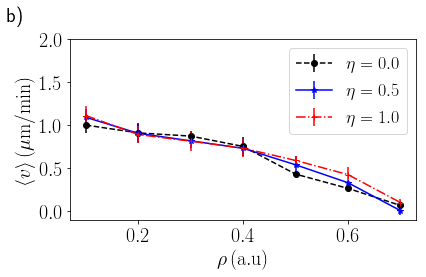

In [21]:
plt_name = 'rigid'
if plt_name == 'flexible':
    s = r'c)'
    rho = pd.read_csv('data/new-data-dpd/Vel-vs-Density-Flex.csv', delim_whitespace=True, comment='#')
elif plt_name == 'rigid':
    s = r'b)'
    rho = pd.read_csv('data/new-data-dpd/Vel-vs-Density-Fixed.csv', delim_whitespace=True, comment='#')
elif plt_name == 'pfm':
    s = r'a)'
    rho = pd.read_csv('data/density.csv')
    
plt.text(-0.05, 2.2, s, fontsize=20)
plt.ylim(-0.1,2.0)   
plt.tick_params(labelsize=20)
ax = plt.subplot(1,1,1)
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
plt.errorbar(rho['rho'],rho['adh0'],yerr=rho['d0'], color='black', linestyle='--', marker='o', label=r'$\eta = 0.0$')
plt.errorbar(rho['rho'],rho['adh05'],yerr=rho['d1'],color='blue', linestyle='-', marker='*', label=r'$\eta = 0.5$')
plt.errorbar(rho['rho'],rho['adh1'],yerr=rho['d2'], color='red', linestyle='-.', marker='+', label=r'$\eta = 1.0$')

plt.xlabel(r'$\rho \,\mathrm{(a.u)}$', fontsize=20)
plt.ylabel(r'$ \langle v \rangle \, (\mu\mathrm{m}/\mathrm{min})$', fontsize=20)
plt.legend(fontsize=18)
#plt.grid()
plt.tight_layout()
plt.savefig("graphs/density_"+plt_name+".png",dpi=600)
plt.show()

In [4]:
import matplotlib.ticker as ticker

In [12]:
data_gyr = pd.read_csv('data/gyr_pt1.csv') # gyration radius data

We measured the gyration radius $R_g$ as a function of  $\rho$ and $\eta$ for a static cell $v = 0$. The gyration radius gives an indirect measure of deformation, but by the following graph we can see that this quantity is not sensible to small values of adhesion. However, for a critical value there is a transition where the gyration radius starts to increase significantly as a function of adhesion. 

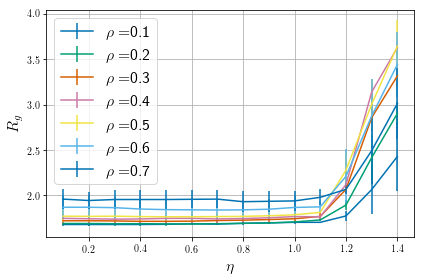

In [13]:
density = 0.10
xmin = 0.0
xmax = 1.1
ymin = 0.0
ymax = 2000.0

while(density<=0.70):
    x = data_gyr.loc[(data_gyr['density']==np.round(density,decimals=2))]
    plt.tight_layout()
    plt.xlabel(r'$\eta $', fontsize=FONT_SIZE)
    plt.ylabel(r'$R_g$', fontsize=FONT_SIZE)
    plt.grid()
    plt.errorbar(x['adhesion'],x['strg']/4.58,x['stdev']/4.58,label=r'$\rho=$'+str(np.round(density,decimals=2))) 
 
   # plt.xlim([xmin,xmax])
   # plt.ylim([ymin,ymax])
    plt.legend(fontsize=FONT_SIZE)
    #plt.savefig("sigma"+str(np.round(density,decimals=2))+".png",dpi=600) 
    
    density+=0.1
plt.savefig("graphs/gyr_radius_lines.png",dpi=600)   
plt.show()



adhesion    0.10
density     0.10
strg        7.69
stdev       0.00
dtype: float64


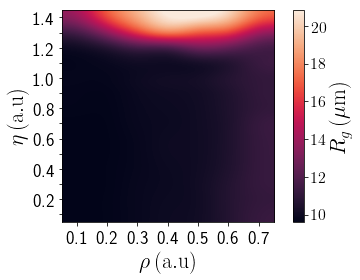

In [30]:
pvt = data_gyr.pivot("adhesion", "density", "strg")
cmap = sns.cm.rocket_r

plt.tick_params(labelsize=18)
rc('text', usetex=True)
#ax = sns.heatmap(pvt/4.58,linewidths=.00, cbar_kws={'label': r'$R_g$'}) # for numbers use annot=True
#ax.fig.axes[0].invert_yaxis()
print(np.min(data_gyr))

im = plt.imshow(pvt*1.25, interpolation='spline36', origin='lower', cmap='rocket', aspect=0.5)
cb = plt.colorbar()
cb.set_label(r'$R_g \, (\mu \mathrm{m})$', fontsize=FONT_SIZE)
cb.ax.tick_params(labelsize=16)
xt = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
yt = [None,0.2,None,0.4,None,0.6,None,0.8,None,1.0,None, 1.2, None, 1.4]
plt.xticks(np.arange(len(xt)), xt)
plt.yticks(np.arange(len(yt)), yt)

plt.xlabel(r'$\rho \,\mathrm{(a.u)}$', fontsize=FONT_SIZE)
plt.ylabel(r'$\eta \,\mathrm{(a.u)}$', fontsize=FONT_SIZE)
#ax.invert_yaxis()
plt.tight_layout()
plt.savefig("graphs/gyration_radius.png",dpi=600)
plt.show()

In [51]:
pvt

density,0.1,0.2,0.3,0.4,0.5,0.6,0.7
adhesion,,,,,,,
0.1,7.69,7.74,7.88,8.00,8.11,8.56,8.97
0.2,7.69,7.74,7.88,7.98,8.10,8.56,8.90
0.3,7.69,7.73,7.87,7.96,8.11,8.54,8.95
0.4,7.69,7.73,7.85,7.97,8.09,8.47,8.95
0.5,7.70,7.72,7.85,8.00,8.08,8.44,8.95
0.6,7.72,7.72,7.86,8.00,8.08,8.43,8.96
0.7,7.71,7.73,7.89,7.97,8.09,8.42,8.97
0.8,7.75,7.75,7.91,7.99,8.10,8.43,8.84
0.9,7.77,7.77,7.94,8.03,8.13,8.46,8.86


### Boxplot with whiskers 

The median is in green, the mean is in orange and the points outside the whiskers are outliers.

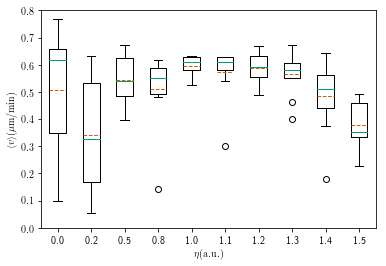

KruskalResult(statistic=29.79089763439311, pvalue=0.00047614111487334306)
Power_divergenceResult(statistic=1.1062105049047832, pvalue=0.9991511888166011)
Power_divergenceResult(statistic=1.1242635822685498, pvalue=0.9990936566179901)
Power_divergenceResult(statistic=0.14372788412461995, pvalue=0.9999998711948818)
Power_divergenceResult(statistic=0.3324758382457257, pvalue=0.9999948060511928)
Power_divergenceResult(statistic=0.022465570216263813, pvalue=0.9999999999680592)
Power_divergenceResult(statistic=0.15930313588850173, pvalue=0.9999997966488426)
Power_divergenceResult(statistic=0.05682833535678868, pvalue=0.999999997949036)
Power_divergenceResult(statistic=0.10614821327532473, pvalue=0.9999999665596764)
Power_divergenceResult(statistic=0.3295701739038681, pvalue=0.9999950013050962)
Power_divergenceResult(statistic=0.17764709161768807, pvalue=0.9999996703923503)


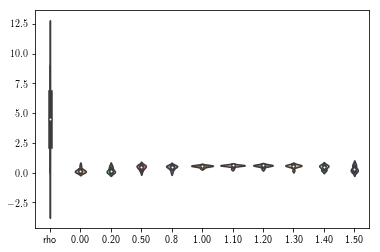

In [2]:
# this code is a bit messy, because I'm loading a sparse matrix and I didn't thought much about it
# just did it in the most pragmatic and dumbest way possible.

datafile = "data/adhesion.csv"
data = pd.read_csv(datafile)
data = data.fillna(0).to_sparse(fill_value=0.0) # filling the empty fields loaded as NaNs with zeros 
columns = ['rho','0.00','0.20','0.50','0.8','1.00','1.10','1.20','1.30','1.40','1.50'] # giving names to the columns
df = pd.DataFrame(data.values, columns=columns) # creating a new DataFrame object and attributing columns' names
a = data.to_numpy() # converting the data object into numpy arrays

al = [0]*10
al[0] = a[0:8,1] # 8 data points only for this density
al[1] = a[0:7,2] # 7 data points
al[1] = [0.32211765205472953, 0.05111041727281055, 0.13037887523316535, 0.015037985779218409, 0.06702231437257618, 0.2682489779827321, 0.5736985360552167, 0.5521033857185071, 0.006127771024742221, 0.007326922294937716]
al[2] = a[0:9,3]
# for the other values we have 10 measures - I should run more points to have the same number for the whole data
# separating the columns in 1D-arrays - this is required for using boxplot
for i in range(3,len(al)):
    al[i] = a[:,i+1]
    
x = []
for i in columns:
    try:
        x.append(np.float(i))
    except:
        continue

al[0] = [0.7698492539920334, 0.7535702554496885, 0.6257374973729681, 0.506015254455221, 0.29704957514287567, 0.670854109052103, 0.09743962683517798, 0.6142383779687478, 0.623810452170976, 0.11524319827983101]
al[1] = [0.3330553284820481, 0.32009747149797724, 0.48112219384653443, 0.16271427525848647, 0.18506420520264763, 0.630840615391844, 0.5736985360552167, 0.5521033857185071, 0.12975685522998565, 0.05568768563027643]
al[2] = [0.5198684126672448, 0.5211198143060929, 0.4214688967338819, 0.595677685781541, 0.4744059618494133, 0.6337992063663656, 0.560259742166104, 0.6329130733402463, 0.6717048446845258, 0.3961929837097267]
al[3] = [0.5934505092025808, 0.5739773991825929, 0.5561881681880498, 0.5475654644145117, 0.48061425141110325, 0.6181219690476203, 0.6014290405035538, 0.4896496555728639, 0.144487484942514, 0.49787201366691597]
al[4] = [0.6291977007238502, 0.5786059650890115, 0.6110386244307336, 0.6123986676139179, 0.5401130376222444, 0.6284340882028561, 0.6321552598566675, 0.526023002369059, 0.6279661306772342, 0.5848443273956189]
al[6] = [0.6057132202378845, 0.5697128051065359, 0.6525447443556321, 0.5769745205102187, 0.4881166575460532, 0.6357944447498777, 0.6279269786272484, 0.5081041939278447, 0.6705969174765791, 0.5498947036719053]
al[7] = [0.5984307901746153, 0.5535642153085222, 0.6428259978025586, 0.5501535829915296, 0.4617171790831267, 0.607106432988456, 0.6080645009423347, 0.40188001264748674, 0.6729771707866333, 0.563330709888556]
al[8] = [0.5122449063223738, 0.5105758285087604, 0.5979996971337264, 0.4645069933158683, 0.18005450125862926, 0.5636151825231417, 0.4313366228732233, 0.37404311382181465, 0.6420009250986348, 0.5615537125002761]
al[9] = [0.31023816148335875, 0.4938285752301711, 0.48165284428462485, 0.3484001493187257, 0.22798496474589064, 0.4200269379757162, 0.35897989599379704, 0.3357799328188463, 0.4725026698321043, 0.33122571077228163]

plt.boxplot(al, labels=x, showmeans=True,meanline=True)
plt.ylim(0,0.8)
plt.xlabel(r"$\eta \textrm{(a.u.)}$")
plt.ylabel(r"$\langle v \rangle (\mu \mathrm{m} / \mathrm{min} )$")
#plt.savefig("graphs/adhesion.png",dpi=600)
plt.show()

  
#  statistical tests - just for curiosity
# Kruskal–Wallis one-way analysis of variance
# One-way ANOVA on ranks
print(stats.kruskal(al[0],al[1],al[2],al[3],al[4],al[5],al[6],al[7],al[8],al[9]))
for i in al:
    #print(stats.kruskal(al[0],i))
    print(stats.chisquare(i))
    


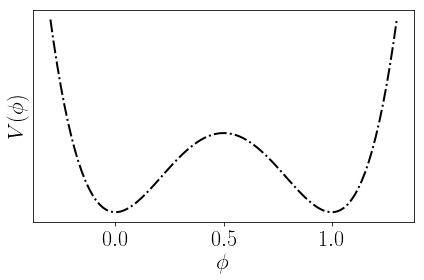

In [15]:
X = np.linspace(-0.3,1.3,100)
h = lambda x: x*x*(3.-2.*x)

def rcal(w0,w1):
    g = lambda x: (x*x*(x-1.)*(x-1))/4. + w1*h(x) + w0*(1.-h(x))
    return g(X)
#plt.grid()
FONT_SIZE = 22
plt.tick_params(labelsize=FONT_SIZE)
Y = rcal(0.0,0.0)
ax = plt.plot(X,Y,linestyle='-.', color='black', lw=2) # color='red'
#Y = rcal(0.01,0.)
#plt.plot(X,Y,linestyle=':')
#Y = rcal(0.0,0.01)
#plt.plot(X,Y,linestyle='--')
plt.xlabel(r'$\phi$',fontsize=FONT_SIZE)
lgd = plt.ylabel(r'$V(\phi)$',fontsize=FONT_SIZE)
plt.yticks([])
plt.tight_layout()
plt.savefig("graphs/higgs.png",dpi=600,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()